In [1]:
# import important libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
print(df.shape)

(1599, 12)


**Description**

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Finding Null Values**

In [5]:
# find any missing value??
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
df.sample(n=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
801,8.6,0.55,0.09,3.3,0.068,8.0,17.0,0.99735,3.23,0.44,10.0,5
239,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6
72,7.7,0.69,0.22,1.9,0.084,18.0,94.0,0.99610,3.31,0.48,9.5,5
146,5.8,0.68,0.02,1.8,0.087,21.0,94.0,0.99440,3.54,0.52,10.0,5
1470,10.0,0.69,0.11,1.4,0.084,8.0,24.0,0.99578,2.88,0.47,9.7,5
1288,7.0,0.60,0.30,4.5,0.068,20.0,110.0,0.99914,3.30,1.17,10.2,5
295,10.8,0.50,0.46,2.5,0.073,5.0,27.0,1.00010,3.05,0.64,9.5,5
414,8.8,0.52,0.34,2.7,0.087,24.0,122.0,0.99820,3.26,0.61,9.5,5
1517,6.5,0.53,0.06,2.0,0.063,29.0,44.0,0.99489,3.38,0.83,10.3,6
1298,5.7,0.60,0.00,1.4,0.063,11.0,18.0,0.99191,3.45,0.56,12.2,6


In [7]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


**Data Analysis**

**Countplot:**

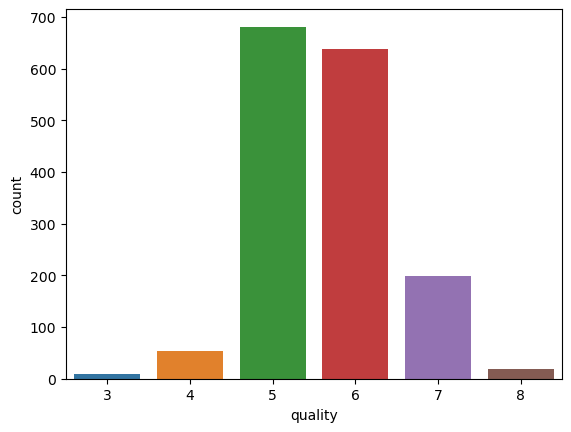

In [8]:
sns.countplot(df, x="quality")
plt.show()

<Axes: xlabel='quality', ylabel='volatile acidity'>

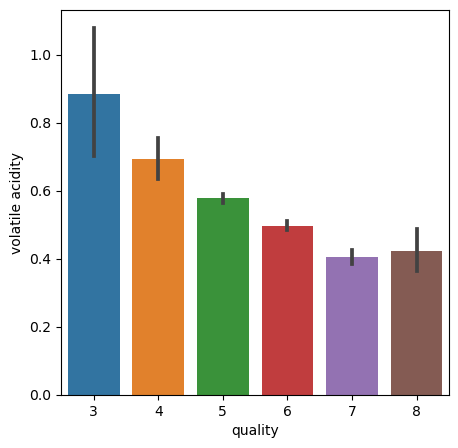

In [9]:
# volatile acidity V/S Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(df, x = "quality", y = "volatile acidity")

<Axes: xlabel='quality', ylabel='citric acid'>

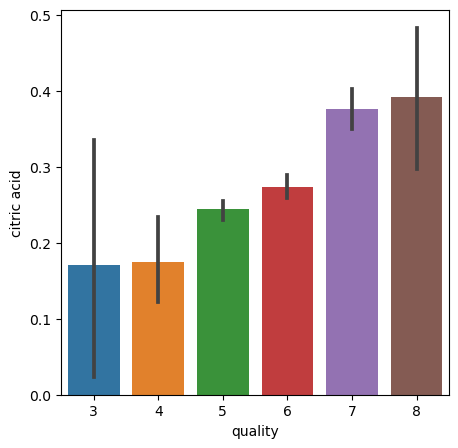

In [10]:
# Citric acid V/S Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(df, x = "quality", y = "citric acid")

# Plotting Heatmap(Corelation Matrix)

- Let's try to see if we can reduce the feature using diffrent techniques
- Let's plot heatmap to visualize and find the coffecient of multicollinearly

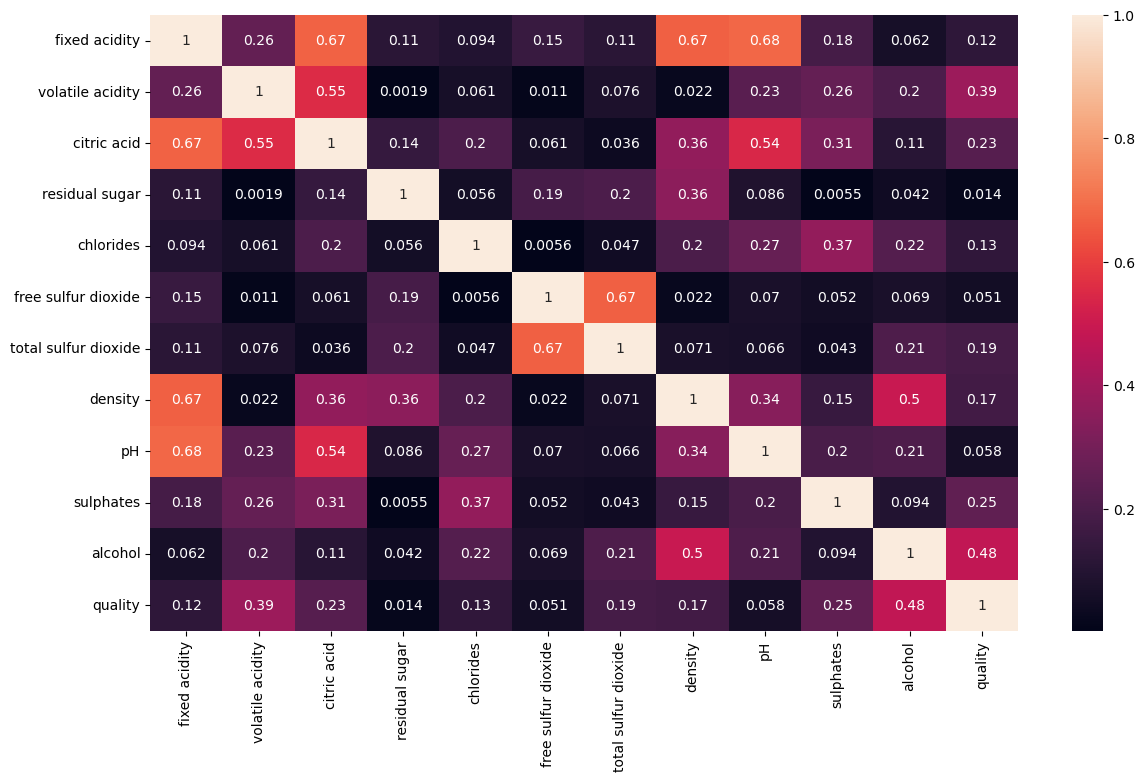

In [11]:
df_corr = df.corr().abs() # This code will get the coefficient of one variable VS all other variables(Relationship)
plt.figure(figsize=(14,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})
plt.show()

**Data Preprocessing**

In [12]:
x = df.drop('quality', axis = 1)

In [13]:
y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

**Train & Test Split Data**

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 41)

**Model Confidence Accuracy**

**Now, we will try DecisionTreeClassifier Model**

In [15]:
#write one function and call as many as times to check accuracy score of diffrent models
def metric_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n------------------------Train Result------------------------------")
        
        print(f"Accuracy score :{accuracy_score(y_train,y_pred) * 100 : .2f}%")
        
    elif train==False:
        pred = clf.predict(x_test)
        
        
        print("\n------------------------Train Result------------------------------")
        
        print(f"Accuracy score :{accuracy_score(y_test,pred) * 100 : .2f}%")
        
        print("/n /n Test Classification Report", classification_report(y_test, pred, digits = 2))#Moel confidence/accuracy


In [16]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
metric_score(clf, x_train, x_test, y_train,y_test, train =True) #this is for training score
metric_score(clf, x_train, x_test, y_train, y_test, train = False) #this is for test score


------------------------Train Result------------------------------
Accuracy score : 100.00%

------------------------Train Result------------------------------
Accuracy score : 88.00%
/n /n Test Classification Report               precision    recall  f1-score   support

           0       0.93      0.93      0.93       339
           1       0.60      0.62      0.61        61

    accuracy                           0.88       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.88      0.88      0.88       400



**Build a Predictive system**

In [18]:
data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
# changing the data into numpy array
data_as_numpy = np.asarray(data)
# reshape the data as we are predicting the label for only one instance 
data_reshaped = data_as_numpy.reshape(1,-1)
prediction = clf.predict(data_reshaped)
print(prediction)

if prediction == 1:
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")



[1]
Good Quality Wine
